In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

I'm assuming that to predict prices 'area_type', 'availability', 'society', 'balcony' these columns are not important . so I'm going to drop them

In [5]:
df2 = df.drop(['area_type', 'availability', 'society', 'balcony'], axis=1)
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


# Handling Null Values

In [6]:
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

My dataset have 13320 rows and the only 90 rows have null values, I can either fill the bath null avlues with their median or drop them. Since the difference between Non null rows and null rows is huge, I can simply and safely drop them.

In [7]:
df2.dropna(inplace=True)
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


# Feature Engineering

Let's do some featurte engineering in 'size' column

In [9]:
df2['size'].value_counts()

size
2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [10]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

BHK stands for Bedrooms Hall Kitchen. And the number indicates how many bedrooms are there. Like 4 BHK means 4 bedrooms, 1 hall, 1 kitchen

In [11]:
df2['bedrooms'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


Now let's take a look at the 'total_sqft' column

In [12]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

At first glance we see the values are in string. and there are variations like range values

In [13]:
def is_float_possible(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df2[df2['total_sqft'].apply(is_float_possible)] # it's giving me all the rows that returns true for the function is applied

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [15]:
df2[~df2['total_sqft'].apply(is_float_possible)].head(10) # it's giving me all the rows that returns False for the function is applied

,location,size,total_sqft,bath,price,bedrooms
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


We can see other than range values there are also some values like Sq.metre, perch etc

In [16]:
def convert_into_float(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    else:
        try:
            return float(x)
        except:
            return x

In [17]:
df3 = df2.copy()

In [18]:
df3['total_sqft'] = df3['total_sqft'].apply(convert_into_float)
df3

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [19]:
df3[~df3['total_sqft'].apply(is_float_possible)].shape

(46, 6)

Other than range values there are more 46 different units values. we can just ignore them becase the number is so small caompare to 13246

In [22]:
df4 = df3[df3['total_sqft'].apply(is_float_possible)]
df4

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [23]:
df4['price_per_Sqft'] = df4['price']*100000/df4['total_sqft']
df4

C:\Users\USER\AppData\Local\Temp\ipykernel_10776\1767089663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['price_per_Sqft'] = df4['price']*100000/df4['total_sqft']


,location,size,total_sqft,bath,price,bedrooms,price_per_Sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.0
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


# Removing Outliars

There are some outliers in the possible ration between total sq ft and size

In [33]:
len(df4.location.unique())

1298

In [37]:
df4['location'] = df4['location'].apply(lambda x: x.strip()) # for avoiding unneccesary spaces

In [48]:
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [57]:
len(location_stats[location_stats<=10])

1047

In [58]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [59]:
df5 = df4.copy()

In [60]:
df5['location'] = df5['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [61]:
df5

,location,size,total_sqft,bath,price,bedrooms,price_per_Sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.0
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [63]:
len(df5.location.unique())

241

In [64]:
df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

location
other                 2872
Whitefield             533
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         264
                      ... 
Pattandur Agrahara      11
Banjara Layout          11
HAL 2nd Stage           11
Doddaballapur           11
Kodigehalli             11
Name: location, Length: 241, dtype: int64

Now let's remove outliers

In [65]:
df5[df5.total_sqft/df5.bedrooms<300]

,location,size,total_sqft,bath,price,bedrooms,price_per_Sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.98081
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.0
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [66]:
df5.shape

(13200, 7)

In [68]:
df5 = df5[~(df5.total_sqft/df5.bedrooms<300)]

In [83]:
df5.isna().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bedrooms          0
price_per_Sqft    0
dtype: int64

In [69]:
df5.shape

(12456, 7)

In [79]:
df5['price_per_Sqft'].std()

4168.127338507347

In [89]:
df5.groupby(['location'])['price_per_Sqft'].agg(['mean','std'])

,mean,std
location,,
1st Block Jayanagar,12359.253758,3931.939592
1st Phase JP Nagar,9726.405918,4802.127570
2nd Phase Judicial Layout,4048.701183,674.730658
2nd Stage Nagarbhavi,14381.27572,5272.435848
5th Block Hbr Layout,6622.120076,4675.410553
...,...,...
Yelahanka,5204.894684,1746.405991
Yelahanka New Town,5860.65987,3889.233175
Yelenahalli,4012.550871,533.259531


In [92]:
def clear_pps_outliars(x):
    df_out = pd.DataFrame()
    for key, subdf in x.groupby('location'):
        m = np.mean(subdf.price_per_Sqft)
        st = np.std(subdf.price_per_Sqft)
        reduce_df = subdf[(subdf.price_per_Sqft >= (m-st)) & (subdf.price_per_Sqft <= (m+st)) ]
        df_out = pd.concat([df_out, reduce_df], ignore_index=True)
    return df_out

In [93]:
df6 = clear_pps_outliars(df5)

In [101]:
df6.drop('size', axis=1, inplace=True)
df6

,location,total_sqft,bath,price,bedrooms,price_per_Sqft
0,1st Block Jayanagar,2850.0,4.0,428.00,4,15017.54386
1,1st Block Jayanagar,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...
10237,other,1353.0,2.0,110.00,2,8130.081301
10238,other,812.0,1.0,26.00,1,3201.970443
10239,other,1440.0,2.0,63.93,3,4439.583333
10240,other,1075.0,2.0,48.00,2,4465.116279


there is some outliars like in same location and square ft area for less bedroom the price is higher than higher bedrooms. So I want to remove those outliars.

In [113]:
def remove_bedprice_inaquaty(x):
    rows_to_remove = []
    df_func = x.sort_values(by=['bedrooms'])
    for _, group in df_func.groupby(['location','total_sqft']):
        for i in range(len(group)-1):
            if group.iloc[i]['price_per_Sqft'] > group.iloc[i+1]['price_per_Sqft']:
                rows_to_remove.append(group.index[i])
    filtered_df = df_func.drop(rows_to_remove)
    return filtered_df

In [115]:
df7 = remove_bedprice_inaquaty(df6)
df7.shape

(8452, 6)

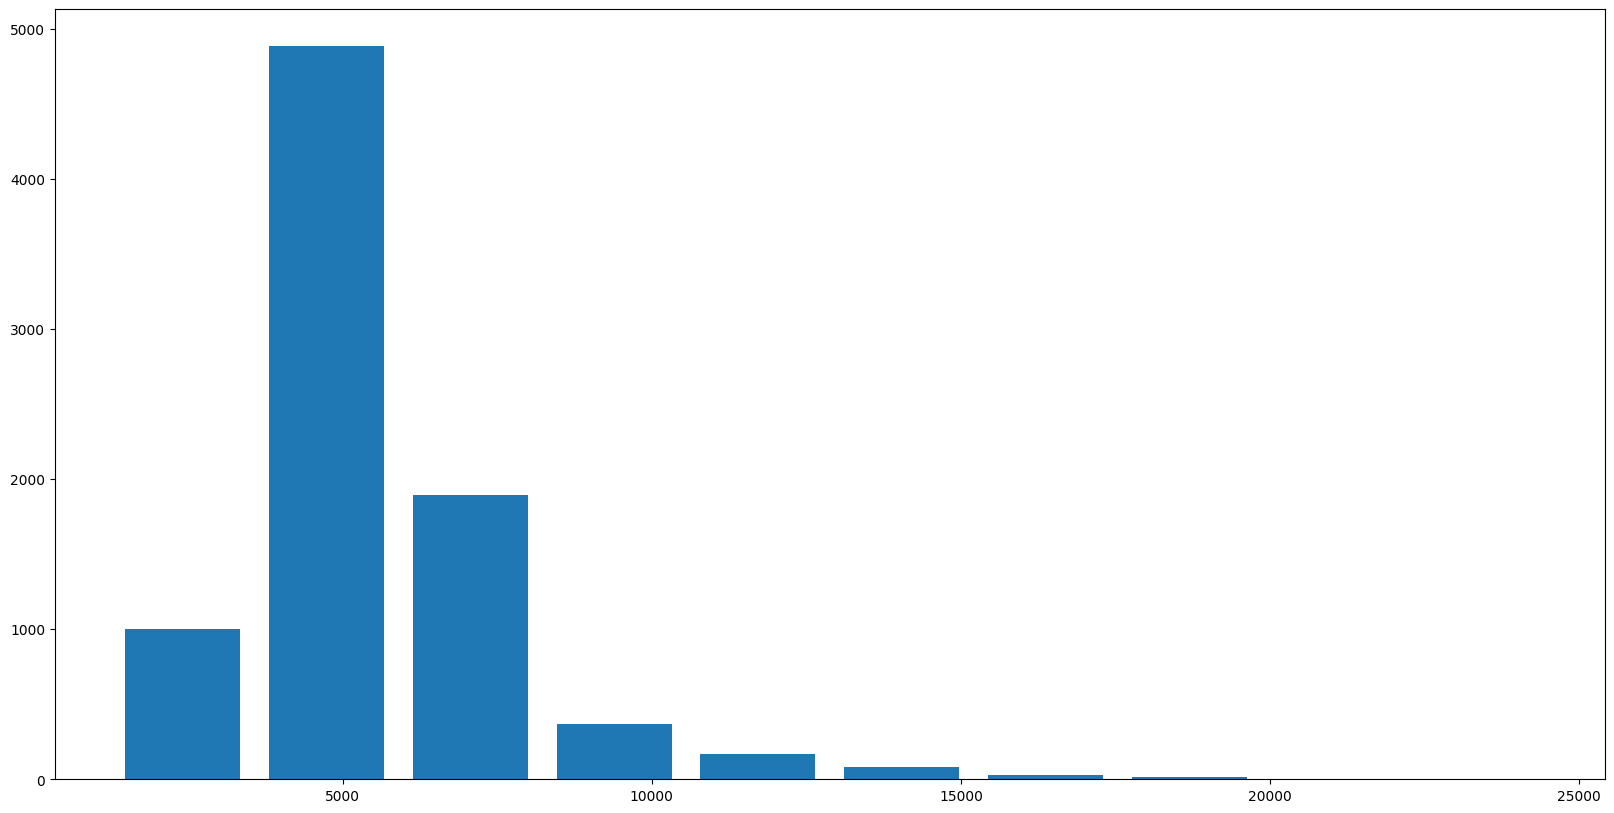

In [117]:
plt.hist(df7.price_per_Sqft, rwidth=0.8)
plt.show()

Now let's look at bathrooms

In [121]:
df7[df7.bath > df7.bedrooms+2]

,location,total_sqft,bath,price,bedrooms,price_per_Sqft
6711,Thanisandra,1806.0,6.0,116.0,3,6423.03433
5238,Nagasandra,7000.0,8.0,450.0,4,6428.571429
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.03252
8408,other,11338.0,9.0,1000.0,6,8819.897689


In [122]:
df7 = df7[df7.bath < df7.bedrooms+2]
df7

,location,total_sqft,bath,price,bedrooms,price_per_Sqft
4679,Kudlu,720.0,1.0,33.00,1,4583.333333
4276,Kasavanhalli,770.0,1.0,43.82,1,5690.909091
546,Attibele,400.0,1.0,10.00,1,2500.0
8441,other,600.0,1.0,17.00,1,2833.333333
554,Attibele,782.0,1.0,19.55,1,2500.0
...,...,...,...,...,...,...
9607,other,3300.0,9.0,450.00,10,13636.363636
9306,other,6000.0,12.0,150.00,11,2500.0
8022,other,5000.0,9.0,360.00,11,7200.0
9637,other,5425.0,13.0,275.00,13,5069.124424


In [124]:
df8 = df7.drop('price_per_Sqft', axis=1)
df8

,location,total_sqft,bath,price,bedrooms
4679,Kudlu,720.0,1.0,33.00,1
4276,Kasavanhalli,770.0,1.0,43.82,1
546,Attibele,400.0,1.0,10.00,1
8441,other,600.0,1.0,17.00,1
554,Attibele,782.0,1.0,19.55,1
...,...,...,...,...,...
9607,other,3300.0,9.0,450.00,10
9306,other,6000.0,12.0,150.00,11
8022,other,5000.0,9.0,360.00,11
9637,other,5425.0,13.0,275.00,13


Now my data is pretty much neet and clean. Now I can make my machine learning model

# Creating Model